## Analysis of Battle-related deaths during natural resource conflicts in Latin-America from 1989 to 2006

## 1. Introduction
Nowadays, wars are still occurring, with the main reason for invasion being natural resources. Unfortunately, the locals are also affected, which leads to an increasing number of deaths. The aim of this project is to distinguish the most devastating years in which the greatest number of civilians were killed, as well as the countries in Latin America where the most calamitous wars happened from 1989 to 2006. The study also helps to identify the main causes of protracted conflicts over natural resources. The area of research is a Latin America, which is generally understood to include the entire continent of South America, plus Mexico, Central America and the islands of the Caribbean.

## 1. Questions

- 1. Which were the top 5 most violent opposing groups, who killed the most number of civilians?
- 2.1. What were the top 5 years/countries in which most civilians were killed in natural resource conflicts in Latin America? 
- 2.2 What were the mechanisms by which violent natural resource conflicts were affected from 1989 to 2006?
---
## 2. Data Sources
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Used Data: Describe the used data you used for the analysis (the output of your data pipeline). Briefly discuss the structure and meaning of the data (such as domain-specific value types), and implement the obligations to comply with the data licenses of your data sources if necessary.

### 2.1 Descriptions of Data Sources

| Datasource Name                                    | Description                                                                                          | Availability | Data Type      | Geographic Coverage              |
|---------------------------------------------------|------------------------------------------------------------------------------------------------------|-------------|----------------|-----------------------------------|
| The Natural Resource Conflict Dataset             | Codes whether internal armed conflicts are clearly linked to natural resources from 1946 - 2006.    | [1]         | Stata          | Global, covering multiple regions |
| UCDP Battle-Related Deaths Dataset version 24.1  | Contains data on battle deaths (soldiers and civilians killed in combat) in state-based conflicts for 1946–2008. | [2]         | Zipped CSV     | Global, covering multiple regions |

---
### 2.2 Licenses and Permissions

Since both datasets, The Natural Resource Conflict Dataset and UCDP Battle-Related Deaths Dataset version 24.1, belong to The Peace Research Institute Oslo (PRIO), we could look at licences and permission denoted by this organization. At this web page you could find this information: 

`...open data policies benefit Norwegian social science – and PRIO in particular...All data collection efforts at PRIO are openly available...` from [3]. This proves that they are under a standard open-data license. Additionally, it was included that, in order to use theirs datasets for a research purpose, you need to include the references to these papers, where they were first presented. You could cite it from [1] and [2].

---

### 2.3 Data Pipeline

**ETL (Extract, Transform, Load) Process**:  
The data pipeline was implemented for two datasets using Python. It consists of several steps provided below:

| Pipeline Name                                           | **Extract**                                                  | **Transform**                                                                                                                                   | **Load**                                   |
|---------------------------------------------------------|--------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------|
| **Natural Resource Conflict Dataset Pipeline**          | Reads metadata and downloads Stata files.                    | Filters rows, removes unnecessary columns, standardizes data format, filters manually for Latin-America countries, removes empty cells and duplicates, adds a `years` column from `start_date` and `end_date`. | Stores transformed data in SQLite database as `conflicts.sqlite`. |
| **UCDP Battle-Related Deaths Dataset Pipeline version 24.1** | Reads zipped metadata and downloads CSV files.               | Filters rows, removes unnecessary columns, filters automatically for Latin-America countries, renames `location_inc` to `location` for consistency with the first pipeline, removes empty cells and duplicates. | Stores transformed data in SQLite database as `deaths.sqlite`. |


More information regarding which transformations and cleaning steps were done and why you could find in a previous section `2.2 Structure and Quality of Data Sources`.

I encountered with the problems:
 - when I tried to filter my datasets for Latin-America countries without a region information, which made me to search for the region of the country manually using maps;
 - when I tried to standardize data format into 'years', 'days', 'months' and 'whole days' from data string type;
 - to decide which columns are meaningful for my task.
 
Regarding Handling Errors or Changing Input Data, I used:
- `prevent_errors` function to remove all empty rows and duplicates using pandas methods: `dropna` and `drop_duplicates`
- a function which removes rows where the `end_date - start_date = 0`or where `the whole_days = 0`
- I changed input data of the dataset 1, which is a datatype string, in order to achieve consistency with the dataset 2. Finally we got a new column `year` to check correspondence with each database.

---
### 2.4 Combined Table

 
                    Table 1. First row of final Dataset, which combines The Natural Resource Conflict Dataset and UCDP Battle-Related Deaths Dataset 
| location       | Government             | Opposing Group      | Year | Deaths | Whole_days |Begin  |End  | Distribution Mechanism | Aggravation Mechanism | Financing Mechanism |
|---------------|------------------------|---------------------|------------|----------|--------|-------------------------|-------------------------------|--------------------|---------------------|--------------------|
| Guatemala     | Government of Guatemala | URNG                | 1989       | 82     | 10,957 | 1996                    | 1995                          | 1                  | 0                   | 0                  |

The final table was created after applying our ETL pipeline to two previously mentioned datasets. By using SQLite operations INNER JOIN, it was saved as a CSV file `combined_dataset.csv`. 

---

### 2.5 Answering the questions

Using SQLite queries I get the results in the forms of tables, which were saved as CSV files, e.g. "quest{}.csv".

1. <img src="quest1.png" width="600"/>
<div style="text-align: center;">Fig 1. Top 5 most violent Opposing Groups <div>
In Figure 1, the bar chart shows the top 5 most violent opposing groups from 1989 to 2006. However, the most bloody aggressor forces were the ELN and Farc in Colombia, who killed 21586 people in 17 years.
2. <img src="quest2.png" width="600"/>

<div style="text-align: center;">Fig 2. Top 5 most violent wars based on year and location </div>
In Figure 2, the scatter plot shows the top 5 most violent wars by year and location. Thus, the worst situation was in 1989 in El Salvador, where the largest number of civilians killed was 4924.

3. <img src="quest3.png" width="600"/>    
<div style="text-align: center;">Fig 3. Mechanisms over Location and number of killed civilians </div>
In Figure 3, the scatter plot shows the mechanisms by which violent natural resource conflicts were affected from 1989 to 2006. Thus, the worst conflicts were in Colombia, where the largest number of civilians killed over 17 years was 21586. It happened due to financing mechanism, where Rebel groups use natural resources to finance rebellion. The second most cruel wars happened in Peru (6482 killed) due to financing mechanism and aggravation mechanism, where natural resource issues aggravate an ongoing conflict. The Third most cruel natural conflict was in El Salvador (5861 killed) due to distribution mechanism, where disagreements arise over distribution of natural resources or revenues. In conclusion, the most common cause of natural conflicts, which leads to enourmous amount of deaths among civilians, was due to financing mechanism.
---


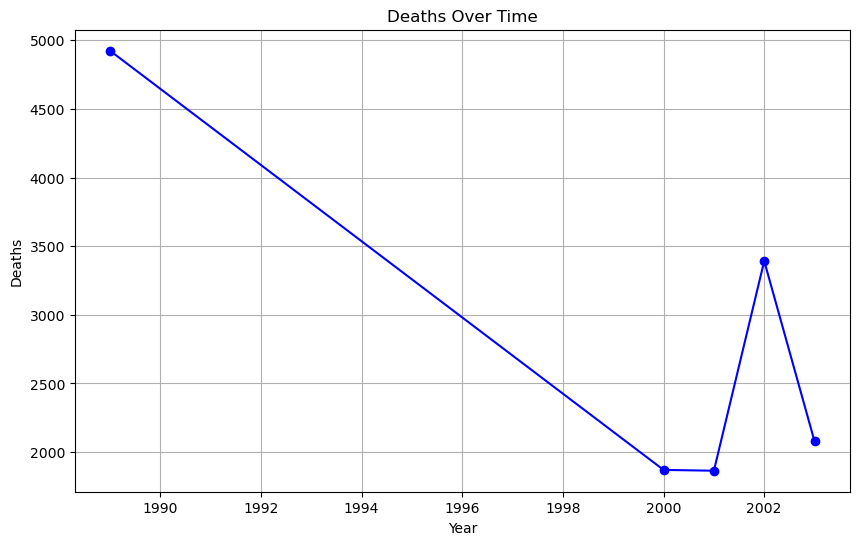

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../data/quest2.csv')

# Display the first few rows of the data
df.head()

# Assuming 'Year' is the x-axis and 'Deaths' is the y-axis
fig, axes = plt.subplot(1, 2, figsize=(10,6))
axes[0].plot(df['year'], df['bd_best'], marker='o', color='b')
axes[0].set_title('Deaths Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Deaths')
# plt.grid(True)



# fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# # Plot 1: Bar plot of total deaths per country
# sns.barplot(x='Country', y='Deaths', data=df, palette='viridis', ax=axes[0])
# axes[0].set_title('Total Deaths per Country')
# axes[0].set_xlabel('Country')
# axes[0].set_ylabel('Total Deaths')
# axes[0].tick_params(axis='x', rotation=45)

# # Plot 2: Line plot of deaths over years (assuming 'Year' is in the dataset)
# sns.lineplot(data=df, x='Year', y='Deaths', ax=axes[1])
# axes[1].set_title('Deaths Over Years')
# axes[1].set_xlabel('Year')
# axes[1].set_ylabel('Deaths')

# Adjust the layout to prevent overlap
plt.tight_layout()
# # plt.savefig('1ques.png', bbox_inches='tight')

plt.show()


In [40]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../data/quest2.csv')

# Display the first few rows of the data
df.head()


,location,side_a,side_b,year,bd_best,whole_days,begin,end,distribution,aggrav,finance
0,El Salvador,Government of El Salvador,FMLN,1989,4924,4747,1979,1991,1,0,0
1,Colombia,Government of Colombia,"ELN, EPL - Megateo, FARC",2000,1870,14747,1966,2006,0,0,1
2,Colombia,Government of Colombia,"ELN, FARC",2001,1864,14747,1966,2006,0,0,1
3,Colombia,Government of Colombia,"ELN, EPL - Megateo, FARC",2002,3392,14747,1966,2006,0,0,1
4,Colombia,Government of Colombia,"ELN, FARC",2003,2078,14747,1966,2006,0,0,1


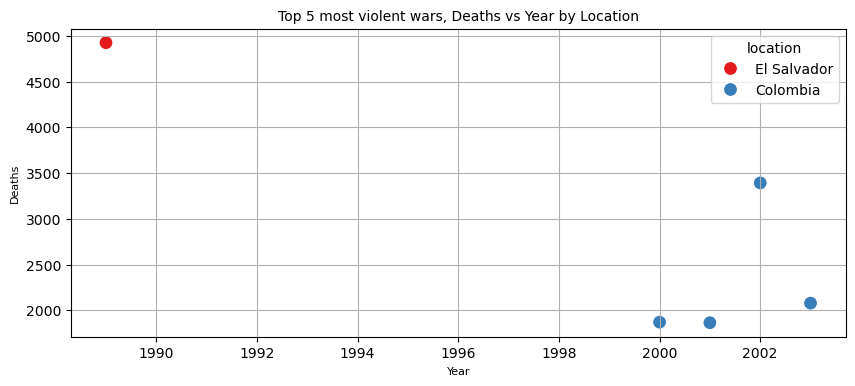

In [44]:
df = pd.read_csv('../data/quest2.csv')

plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x='year', y='bd_best', hue='location', palette='Set1', s=100)

# Set title and labels
plt.title('Top 5 most violent wars, Deaths vs Year by Location', fontsize=10)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Deaths', fontsize=8)
plt.grid(True)
plt.savefig('quest2.png', bbox_inches='tight')
# Show the plot
plt.show()


<Figure size 1000x400 with 0 Axes>

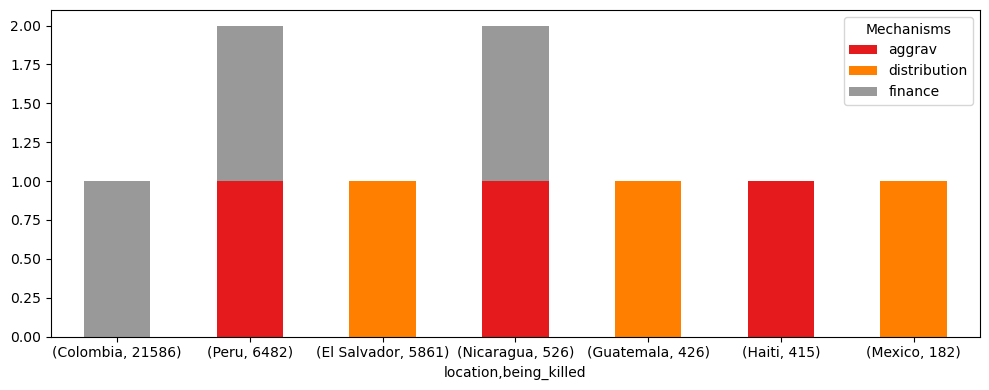

In [54]:
df = pd.read_csv('../data/quest3.csv')

# plt.figure(figsize=(10, 4))
# sns.scatterplot(data=df, x='year', y='being_killed', hue='location', palette='Set1', s=100)

# # Set title and labels
# plt.title('Top 5 most violent wars, Deaths vs Year by Location', fontsize=10)
# plt.xlabel('Year', fontsize=8)
# plt.ylabel('Deaths', fontsize=8)
# plt.grid(True)
# # plt.savefig('quest2.png', bbox_inches='tight')
# # Show the plot
# plt.show()

# Reshape data for plotting
df_melted = df.melt(id_vars=['location', 'being_killed'], 
                    value_vars=['distribution', 'aggrav', 'finance'], 
                    var_name='Mechanisms', value_name='Value')

# Set up the plot
plt.figure(figsize=(10, 4))

# Count the occurrences of each category per Location and Being_Killed combination
count_data = df_melted[df_melted['Value'] == 1].groupby(['location', 'being_killed', 'Mechanisms']).size().unstack(fill_value=0)

count_data = count_data.sort_values(by='being_killed', ascending=False)

# Plotting
ax = count_data.plot(kind='bar', stacked=True, figsize=(10, 4), cmap='Set1')

plt.xticks(rotation=0)
# Show the plot
plt.tight_layout()

plt.savefig('quest3.png', bbox_inches='tight')
plt.show()

In [43]:
df.head()

,location,side_a,side_b,year,bd_best,whole_days,begin,end,distribution,aggrav,finance,being_killed
0,Colombia,Government of Colombia,"ELN, EPL, FARC",1989,238,14747,1966,2006,0,0,1,21586
1,Peru,Government of Peru,"Sendero Luminoso, MRTA",1989,1827,6712,1981,1999,0,1,1,6482
2,El Salvador,Government of El Salvador,FMLN,1989,4924,4747,1979,1991,1,0,0,5861
3,Nicaragua,Government of Nicaragua,Contras,1989,526,2875,1981,1989,0,1,1,526
4,Guatemala,Government of Guatemala,URNG,1989,82,10957,1965,1995,1,0,0,426


/tmp/ipykernel_3361427/2854813017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='side_b', y='killed', data=df, palette='viridis')


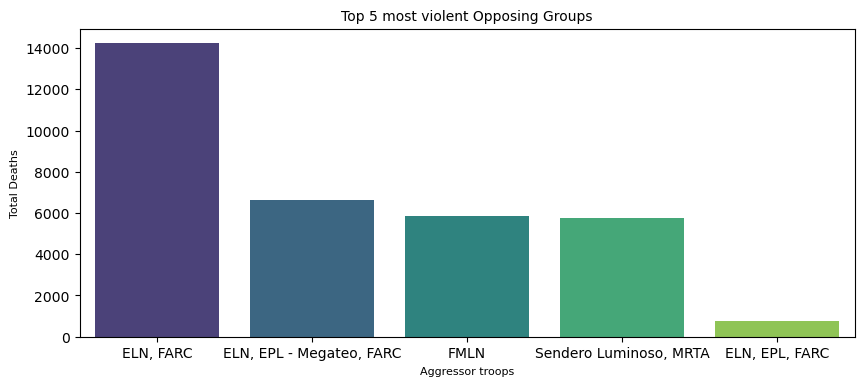

In [38]:
df = pd.read_csv('../data/quest1.csv')
plt.figure(figsize=(10, 4))
sns.barplot(x='side_b', y='killed', data=df, palette='viridis')

# Add title and labels
plt.title('Top 5 most violent Opposing Groups', fontsize=10)
plt.xlabel('Aggressor troops', fontsize=8)
plt.ylabel('Total Deaths', fontsize=8)

plt.savefig('quest1.png', bbox_inches='tight')

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)
plt.show()




## 3. Results and Limitations


- **Results**:
  - Datasets stored in SQLite include only Latin-America countries. They were stored in a that way due to necessity of combining 2 different tables, that could be done using foreign keys, e.g. `year` and `location` .
  - The datasets are complete by removing empty and duplicates values
  - They are consistent in terms of same columns of a `year` and a `location` across both datasets
  - They have same timeliness in terms of the `year` column.

- **Limitations**:
  - Timeliness issue: The dataset 2 [2] does not include the starting and ending dates, but rather `years`. For this reason, we could depend regarding precise days on the data given from the table 1 [1].  

---

## References

1. [The Natural Resource Conflict Dataset- Web page](https://www.prio.org/data/23).  
2. [UCDP Battle-Related Deaths Dataset version 24.1 - Web page](https://ucdp.uu.se/downloads/index.html#battlerelated).  
3. [PRIO license](https://blogs.prio.org/2019/10/why-open-data/).
4. [UCDP Battle-Related Deaths Dataset version 24.1 - Link to the article](https://www.prio.org/projects/1292).
